<a href="https://colab.research.google.com/github/DivyanshKs/Data-Analysis-with-Pandas-and-Python/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression - 0**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sn

In [3]:
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [4]:
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
print(y_test)
print(y_pred)

22    0
20    1
25    1
4     0
10    0
15    0
28    1
11    1
18    0
29    1
Name: admitted, dtype: int64
[0 0 1 1 0 0 1 1 0 1]


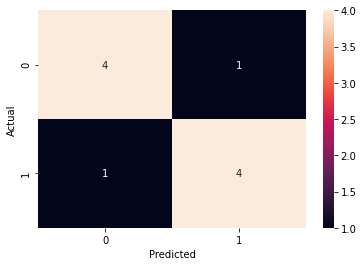

In [12]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [22]:
from sklearn import metrics
print("Acuuracy of the model = ",metrics.accuracy_score(y_test,y_pred))

Acuuracy of the model =  0.8


**Logistic Regression - 1**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sn

In [30]:
dataset = pd.read_csv('Ads.csv')
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


In [32]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:,4].values
x,y

(array([[1.90e+01, 1.90e+04],
        [3.50e+01, 2.00e+04],
        [2.60e+01, 4.30e+04],
        [2.70e+01, 5.70e+04],
        [1.90e+01, 7.60e+04],
        [2.70e+01, 5.80e+04],
        [2.70e+01, 8.40e+04],
        [3.20e+01, 1.50e+05],
        [2.50e+01, 3.30e+04],
        [3.50e+01, 6.50e+04],
        [2.60e+01, 8.00e+04],
        [2.60e+01, 5.20e+04],
        [2.00e+01, 8.60e+04],
        [3.20e+01, 1.80e+04],
        [1.80e+01, 8.20e+04],
        [2.90e+01, 8.00e+04],
        [4.70e+01, 2.50e+04],
        [4.50e+01, 2.60e+04],
        [4.60e+01, 2.80e+04],
        [4.80e+01, 2.90e+04],
        [4.50e+01, 2.20e+04],
        [4.70e+01, 4.90e+04],
        [4.80e+01, 4.10e+04],
        [4.50e+01, 2.20e+04],
        [4.60e+01, 2.30e+04],
        [4.70e+01, 2.00e+04],
        [4.90e+01, 2.80e+04],
        [4.70e+01, 3.00e+04],
        [2.90e+01, 4.30e+04],
        [3.10e+01, 1.80e+04],
        [3.10e+01, 7.40e+04],
        [2.70e+01, 1.37e+05],
        [2.10e+01, 1.60e+04],
        [2

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [37]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
x_train, x_test

(array([[ 0.58164944, -0.88670699],
        [-0.60673761,  1.46173768],
        [-0.01254409, -0.5677824 ],
        [-0.60673761,  1.89663484],
        [ 1.37390747, -1.40858358],
        [ 1.47293972,  0.99784738],
        [ 0.08648817, -0.79972756],
        [-0.01254409, -0.24885782],
        [-0.21060859, -0.5677824 ],
        [-0.21060859, -0.19087153],
        [-0.30964085, -1.29261101],
        [-0.30964085, -0.5677824 ],
        [ 0.38358493,  0.09905991],
        [ 0.8787462 , -0.59677555],
        [ 2.06713324, -1.17663843],
        [ 1.07681071, -0.13288524],
        [ 0.68068169,  1.78066227],
        [-0.70576986,  0.56295021],
        [ 0.77971394,  0.35999821],
        [ 0.8787462 , -0.53878926],
        [-1.20093113, -1.58254245],
        [ 2.1661655 ,  0.93986109],
        [-0.01254409,  1.22979253],
        [ 0.18552042,  1.08482681],
        [ 0.38358493, -0.48080297],
        [-0.30964085, -0.30684411],
        [ 0.97777845, -0.8287207 ],
        [ 0.97777845,  1.867

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [48]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_train, y_train, cv = 8)
scores

array([0.81578947, 0.86842105, 0.76315789, 0.71052632, 0.67567568,
       0.91891892, 0.97297297, 0.89189189])

In [51]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]])

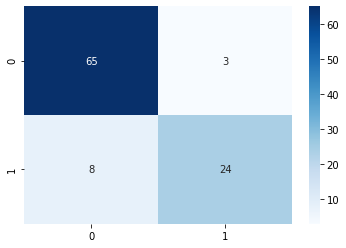

In [53]:
import seaborn as sn
sn.heatmap(cm, annot = True, cmap = 'Blues')

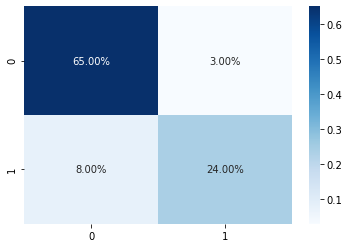

In [55]:
sn.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


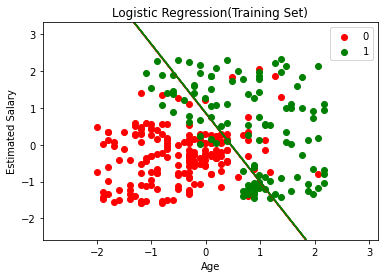

In [61]:
#Visualizing the Training Set Results
from matplotlib.colors import ListedColormap
x_set , y_set = x_train ,y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop =x_set[:,0].max()+1,step=0.01),
                    np.arange(start = x_set[:,1].min()-1,stop =x_set[:,1].max()+1,step=0.01))
plt.contour(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha= 0.75 ,cmap = ListedColormap(('red','green')))
plt.xlim(x1.min() ,x1.max())
plt.ylim(x2.min() ,x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j ,0], x_set[y_set == j,1],
                c= ListedColormap(('red' , 'green'))(i) , label = j)
plt.title('Logistic Regression(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


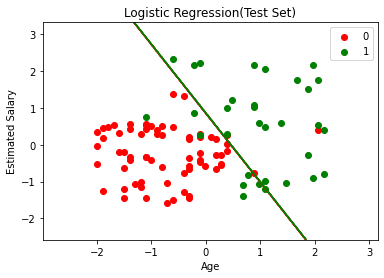

In [62]:
#Visualizing the Test Set Results
from matplotlib.colors import ListedColormap
x_set , y_set = x_test ,y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop =x_set[:,0].max()+1,step=0.01),
                    np.arange(start = x_set[:,1].min()-1,stop =x_set[:,1].max()+1,step=0.01))
plt.contour(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha= 0.75 ,cmap = ListedColormap(('red','green')))
plt.xlim(x1.min() ,x1.max())
plt.ylim(x2.min() ,x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j ,0], x_set[y_set == j,1],
                c= ListedColormap(('red' , 'green'))(i) , label = j)
plt.title('Logistic Regression(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [64]:
metrics.accuracy_score(y_test, y_pred)

0.89

**Logistic Regression - 2 (Iris Dataset)**

In [74]:
from sklearn import datasets
import matplotlib.pyplot as plt
data = datasets.load_iris()
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [75]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [76]:
X = data.data[:,:2]
y = (data.target!=0)

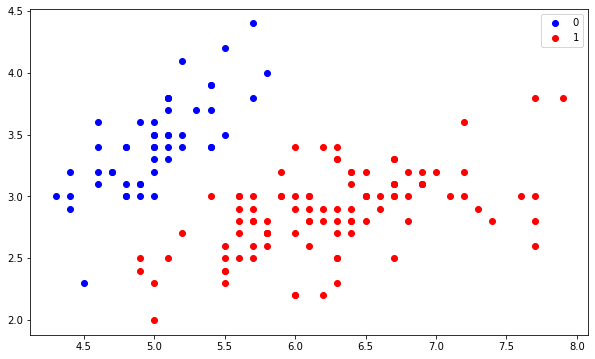

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], color = 'b', label = '0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color = 'r', label = '1')
plt.legend();

In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)
y_pred = model.predict(X)
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [80]:
metrics.accuracy_score(y, preds)

1.0

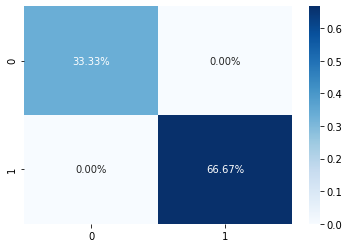

In [83]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred)
import seaborn as sns
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

**Logistic Resgression - 3**

In [90]:
#Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Importing the data
df =pd.read_csv('Chip_test.csv').values
df.shape  

(118, 3)

In [91]:
x = df[:,0:2]
y = df[:,-1]

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [93]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.])

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[8, 9],
       [6, 7]])

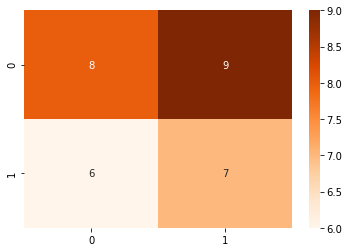

In [98]:
import seaborn as sn
sn.heatmap(cm, annot = True, cmap = 'Oranges')

In [99]:
metrics.accuracy_score(y_test, y_pred)

0.5

**Logistic Regression - 4**

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('examdata.csv').values
df.shape

(100, 3)

In [102]:
x = df[:, 0:2]
y = df[:, 2]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [103]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[8, 2],
       [1, 9]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


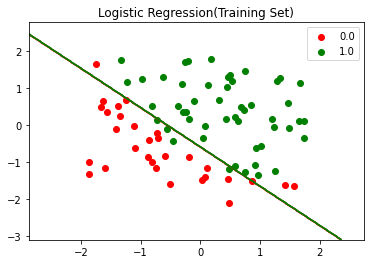

In [105]:
from matplotlib.colors import ListedColormap
x_set , y_set = x_train ,y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop =x_set[:,0].max()+1,step=0.01),
                    np.arange(start = x_set[:,1].min()-1,stop =x_set[:,1].max()+1,step=0.01))
plt.contour(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha= 0.75 ,cmap = ListedColormap(('red','green')))
plt.xlim(x1.min() ,x1.max())
plt.ylim(x2.min() ,x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j ,0], x_set[y_set == j,1],
                c= ListedColormap(('red' , 'green'))(i) , label = j)
plt.title('Logistic Regression(Training Set)')
plt.legend()
plt.show()
      

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


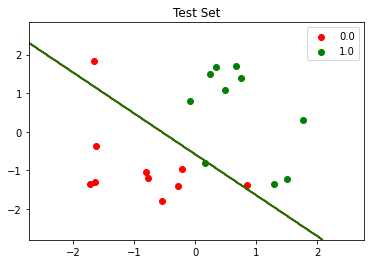

In [106]:
from matplotlib.colors import ListedColormap
x_set , y_set = x_test ,y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop =x_set[:,0].max()+1,step=0.01),
                    np.arange(start = x_set[:,1].min()-1,stop =x_set[:,1].max()+1,step=0.01))
plt.contour(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha= 0.75 ,cmap = ListedColormap(('red','green')))
plt.xlim(x1.min() ,x1.max())
plt.ylim(x2.min() ,x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j ,0], x_set[y_set == j,1],
                c= ListedColormap(('red' , 'green'))(i) , label = j)
plt.title('Test Set')
 
plt.legend()

In [107]:
metrics.accuracy_score(y_test, y_pred)

0.85

**Logistic Regression - 5**

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('LR_df.csv').values
X = dataset[:, 0].reshape(-1, 1)
y = dataset[:, -1] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[108,  23],
       [ 45,  16]])

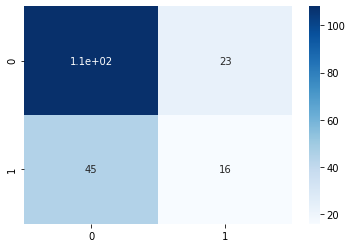

In [109]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues')

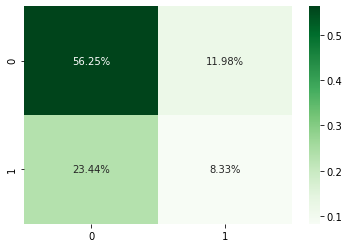

In [110]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Greens')

In [111]:
metrics.accuracy_score(y_test,y_pred)

0.6458333333333334